<a href="https://colab.research.google.com/github/thamyrys-bl/example-geobr/blob/main/Geocodificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configurar o notebook 


In [ ]:
%%time
#Atualizando lista de pacotes, atualizando versões e instalando bibliotecas
!apt update -q
!apt upgrade -q
!apt install gdal-bin python-gdal python3-gdal -q
!apt install python3-rtree -q
!pip install geopandas==0.10.0


Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (164 kB/s)
Reading package lis

In [ ]:
!pip install descartes -q

#1. Geocodificação


In [ ]:
# Leia o arquivo do seu computador
from google.colab import files
uploaded=files.upload()

Saving enderecos.txt to enderecos (2).txt


In [ ]:
uploaded

{'enderecos.txt': b'Bar;Endere\xc3\xa7o\r\nBar do Coronel;R. Francisco Rafael, 298, S\xc3\xa3o Jos\xc3\xa9 Dos Campos\r\nSnooker Music Bar;Av Andr\xc3\xb4meda 3330, S\xc3\xa3o Jos\xc3\xa9 Dos Campos\r\nKadu bar e creperia;R. Inconfidencia, 298, S\xc3\xa3o Jos\xc3\xa9 Dos Campos\r\nBoemia e Rapsodias;Av. Rui Barbosa, 1985, S\xc3\xa3o Jos\xc3\xa9 Dos Campos'}

In [ ]:
import io
import pandas as pd

dados=pd.read_csv(io.StringIO(uploaded['enderecos.txt'].decode('utf-8')), sep=';')

In [ ]:
#dados=pd.read_csv('enderecos.txt', sep=';')

In [ ]:
dados.head()

,Bar,Endereço
0,Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos"
1,Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos"
2,Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos"
3,Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos"


In [ ]:
#Importando o geocodificador
from geopandas.tools import geocode
help(geocode)

Help on function geocode in module geopandas.tools.geocoding:

geocode(strings, provider=None, **kwargs)
    Geocode a set of strings and get a GeoDataFrame of the resulting points.
    
    Parameters
    ----------
    strings : list or Series of addresses to geocode
    provider : str or geopy.geocoder
        Specifies geocoding service to use. If none is provided,
        will use 'photon' (see the Photon's terms of service at:
        https://photon.komoot.io).
    
        Either the string name used by geopy (as specified in
        geopy.geocoders.SERVICE_TO_GEOCODER) or a geopy Geocoder instance
        (e.g., geopy.geocoders.Photon) may be used.
    
        Some providers require additional arguments such as access keys
        See each geocoder's specific parameters in geopy.geocoders
    
    Notes
    -----
    Ensure proper use of the results by consulting the Terms of Service for
    your provider.
    
    Geocoding requires geopy. Install it using 'pip install geopy'

In [ ]:
#Realizando a geocodificação
geo=geocode(dados['Endereço'], provider='nominatim')
geo.head()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,geometry,address
0,POINT (-45.88340 -23.18181),"Rua Francisco Rafael, Jardim Bela Vista, São J..."
1,POINT (-45.88523 -23.24417),"Avenida Andrômeda, Jardim Estoril, São José do..."
2,POINT (-45.88814 -23.19710),"Rua Inconfidência, Jardim São Dimas, São José ..."
3,POINT (-45.90462 -23.14942),"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu..."


# 2. Junção de tabela

In [ ]:
# Realizando o table join
comb=geo.merge(dados,left_index=True,right_index=True)
comb.head()

,geometry,address,Bar,Endereço
0,POINT (-45.88340 -23.18181),"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos"
1,POINT (-45.88523 -23.24417),"Avenida Andrômeda, Jardim Estoril, São José do...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos"
2,POINT (-45.88814 -23.19710),"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos"
3,POINT (-45.90462 -23.14942),"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos"


In [ ]:
type(comb)

geopandas.geodataframe.GeoDataFrame

In [ ]:
%matplotlib inline
import geopandas as gpd

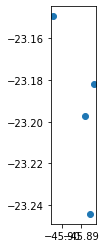

In [ ]:
comb.plot()

In [ ]:
comb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
comb.to_file('/content/drive/MyDrive/Colab Notebooks/Geocodificacao.ipynb.shp')

#3. Consultas espaciais: contains() e within()

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
p1=Point(51.11030009,17.038199)
p2=Point(51.106977,17.016376)


In [ ]:
plg=Polygon([(51.114671, 17.022160),(51.108502, 17.022468),(51.104253, 17.041725),(51.112447, 17.044875)])

In [ ]:
print(p1)
print(p2)
print(plg)

POINT (51.11030009 17.038199)
POINT (51.106977 17.016376)
POLYGON ((51.114671 17.02216, 51.108502 17.022468, 51.104253 17.041725, 51.112447 17.044875, 51.114671 17.02216))


In [ ]:
p1.within(plg)

True

In [ ]:
p2.within(plg)

False

In [ ]:
plg.contains(p1)

True

In [ ]:
plg.contains(p2)

False

# 4. Consultas espaciais: intersect() e touches()

In [ ]:
from shapely.geometry import LineString, MultiLineString

In [ ]:
la=LineString([(0,0),(1,1)])
lb=LineString([(1,1),(0,2)])


In [ ]:
la.intersects(lb)

True

In [ ]:
lb.intersects(la)

True

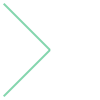

In [ ]:
m1=MultiLineString([la,lb])
m1

A linha lb continua do mesmo vértice (1,1) que a linha la termina. No entanto, se as linhas se sobrepuserem, elas não se tocam por definição.

Vamos testas com a linha lb.

In [ ]:
lb.touches(lb)

False

In [ ]:
lb.intersects(lb)

True

#5. Junção espacial

In [ ]:
import geopandas as gpd
#setores=gpd.read_file('/content/35SEE250GC_SIR.shx)
#não funciona o caminho copiado do computador,pq?

# Leia o arquivo do seu computador
#from google.colab import files
#uploaded=files.upload()

In [ ]:
#uploaded

In [ ]:
setores=gpd.read_file('/content/35SEE250GC_SIR.shp')

ERROR:fiona._env:Error in fread() reading object of size 488 at offset 76546000 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 376 at offset 76546488 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 440 at offset 76546864 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 440 at offset 76547304 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 392 at offset 76547744 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 76548136 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 76548272 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 76548408 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 76548544 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 76548680 from .shp file
ERROR:fiona._env:Error in fread() reading object o

In [ ]:
setores.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [ ]:
import pandas as pd
print(pd.unique(setores.NM_MUNICIP))

['PRAIA GRANDE' 'ARAÇATUBA' 'ATIBAIA' 'ADAMANTINA' 'ADOLFO' 'AGUAÍ'
 'ÁGUAS DA PRATA' 'ÁGUAS DE LINDÓIA' 'ÁGUAS DE SANTA BÁRBARA'
 'ÁGUAS DE SÃO PEDRO' 'AGUDOS' 'ALAMBARI' 'ALFREDO MARCONDES' 'ALTAIR'
 'ALTINÓPOLIS' 'ALTO ALEGRE' 'ALUMÍNIO' 'ÁLVARES FLORENCE'
 'ÁLVARES MACHADO' 'ÁLVARO DE CARVALHO' 'ALVINLÂNDIA' 'AMERICANA'
 'AMÉRICO BRASILIENSE' 'AMÉRICO DE CAMPOS' 'AMPARO' 'ANALÂNDIA'
 'ANDRADINA' 'ANGATUBA' 'ANHEMBI' 'ANHUMAS' 'APARECIDA'
 "APARECIDA D'OESTE" 'APIAÍ' 'ARAÇARIGUAMA' 'ARAÇOIABA DA SERRA' 'ARAMINA'
 'ARANDU' 'ARAPEÍ' 'ARARAQUARA' 'ARARAS' 'ARCO-ÍRIS' 'AREALVA' 'AREIAS'
 'AREIÓPOLIS' 'ARIRANHA' 'ARTUR NOGUEIRA' 'ARUJÁ' 'ASPÁSIA' 'ASSIS'
 'AURIFLAMA' 'AVAÍ' 'AVANHANDAVA' 'AVARÉ' 'BADY BASSITT' 'BALBINOS'
 'BÁLSAMO' 'BANANAL' 'BARÃO DE ANTONINA' 'BARBOSA' 'BARIRI' 'BARRA BONITA'
 'BARRA DO CHAPÉU' 'BARRA DO TURVO' 'BARRETOS' 'BARUERI' 'BAURU'
 'BENTO DE ABREU' 'BERNARDINO DE CAMPOS' 'BIRIGUI' 'BOITUVA' 'BARRINHA'
 'BASTOS' 'BATATAIS' 'BEBEDOURO' 'BERTIOGA' 'BILAC' 'BIRITI

In [ ]:
setores=setores[setores.NM_MUNICIP=='SÃO JOSÉ DOS CAMPOS']
setores=setores.reset_index()
setores.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1..."
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1..."
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1..."
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1..."
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1..."


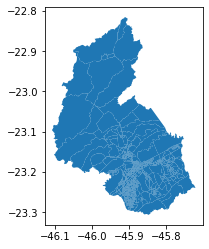

In [ ]:
setores.plot()

In [ ]:
setores.to_file('/content/drive/MyDrive/Colab Notebooks/rset_sjc.shp') #MyDRive/Colab Notebooks

In [ ]:
pop10= pd.read_csv('/content/residentes.csv', sep=';')
pop10.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251
0,350010505000001,1,304,249,3,28,24,0,5,0,...,20,1,5,1,0,1,0,0,1,0
1,350010505000002,1,785,550,13,86,136,0,17,0,...,53,0,15,8,0,1,0,0,1,0
2,350010505000003,1,524,432,3,65,24,0,9,0,...,64,0,14,2,0,2,0,1,0,0
3,350010505000004,1,795,613,8,63,111,0,29,0,...,59,0,8,8,0,1,0,0,1,0
4,350010505000005,1,813,744,4,31,33,1,30,0,...,69,0,7,1,1,2,0,0,0,0


In [ ]:
pop10.rename(columns={'V001':'pop'}, inplace=True)
pop10.head()

,Cod_setor,Situacao_setor,pop,V002,V003,V004,V005,V006,V007,V008,...,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251
0,350010505000001,1,304,249,3,28,24,0,5,0,...,20,1,5,1,0,1,0,0,1,0
1,350010505000002,1,785,550,13,86,136,0,17,0,...,53,0,15,8,0,1,0,0,1,0
2,350010505000003,1,524,432,3,65,24,0,9,0,...,64,0,14,2,0,2,0,1,0,0
3,350010505000004,1,795,613,8,63,111,0,29,0,...,59,0,8,8,0,1,0,0,1,0
4,350010505000005,1,813,744,4,31,33,1,30,0,...,69,0,7,1,1,2,0,0,0,0


In [ ]:
pop10=pop10[['Cod_setor','pop']]
pop10.head()

,Cod_setor,pop
0,350010505000001,304
1,350010505000002,785
2,350010505000003,524
3,350010505000004,795
4,350010505000005,813


In [ ]:
print(pop10.shape)

(47733, 2)


In [ ]:
print(pop10.columns)

Index(['Cod_setor', 'pop'], dtype='object')


In [ ]:
print(type(pop10.Cod_setor[0]))
print(type(setores.CD_GEOCODI[0]))

<class 'numpy.int64'>
<class 'str'>


In [ ]:
setores['Cod_setor']=pd.to_numeric(setores.CD_GEOCODI)

In [ ]:
print(type(pop10.Cod_setor[0]))
print(type(setores.Cod_setor[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [ ]:
set_pop=setores.merge(pop10, on='Cod_setor', how='left')
set_pop.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_setor,pop
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1...",354990405000001,359.0
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1...",354990405000002,319.0
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1...",354990405000003,542.0
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1...",354990405000004,42.0
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1...",354990405000005,435.0


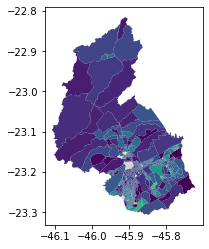

In [ ]:
set_pop.plot(column='pop', cmap='viridis', vmin=min(set_pop['pop']), vmax=max(set_pop['pop']),
             missing_kwds=dict(color='lightgrey',))
           


In [ ]:
set_pop=set_pop[['pop', 'geometry', 'Cod_setor']]
set_pop.head()

,pop,geometry,Cod_setor
0,359.0,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1...",354990405000001
1,319.0,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1...",354990405000002
2,542.0,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1...",354990405000003
3,42.0,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1...",354990405000004
4,435.0,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1...",354990405000005


In [ ]:
setores.shape

(1074, 17)

In [ ]:
set_pop.shape

(1074, 3)

In [ ]:
set_pop.to_file('/content/drive/MyDrive/Colab Notebooks/pop_sjc.shp') #Mydrive/Colab Notebooks

In [ ]:
#Agora podemos iniciar nossa jornada espacial
bares=gpd.read_file('/content/bares_sjc.shp')
bares.head()

,address,Bar,Endereço,geometry
0,"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos",POINT (-45.88340 -23.18181)
1,"Avenida Andrômeda, Jardim Estoril, São José do...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos",POINT (-45.88523 -23.24417)
2,"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos",POINT (-45.88841 -23.19559)
3,"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos",POINT (-45.90462 -23.14942)


In [ ]:
bares.crs==set_pop.crs

False

In [ ]:
print(bares.crs)
print(set_pop.crs)

epsg:4326
epsg:4674


In [ ]:
set_pop=set_pop.to_crs(crs='epsg:4326')
set_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bares.crs==set_pop.crs

True

In [ ]:
import geopandas as geopandas
import gdal

sjc_join=gpd.sjoin(bares, set_pop, how='inner', predicate='within')
sjc_join.head()

,address,Bar,Endereço,geometry,index_right,pop,Cod_setor
0,"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos",POINT (-45.88340 -23.18181),2,542.0,354990405000003
1,"Avenida Andrômeda, Jardim Estoril, São José do...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos",POINT (-45.88523 -23.24417),508,655.0,354990405000468
2,"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos",POINT (-45.88841 -23.19559),51,287.0,354990405000052
3,"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos",POINT (-45.90462 -23.14942),176,1054.0,354990405000177


In [ ]:
!pip install contextily -q
!pip install mapclassify==2.4.0 -q

In [ ]:
import contextily as cx

sjc_join.crs



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

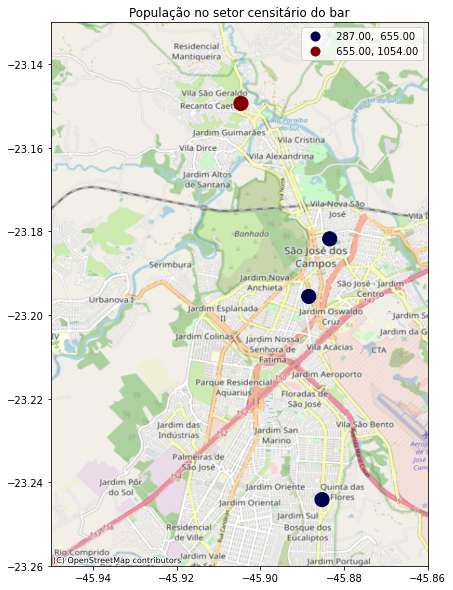

In [ ]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(10,10))
sjc_join.plot(ax=ax, cmap='seismic', column='pop', markersize=200, scheme='natural_breaks', k=2, legend=True)
plt.xlim(-45.95, -45.86)
plt.ylim(-23.26, -23.13,)
plt.title('População no setor censitário do bar')
cx.add_basemap(ax=ax, crs='epsg:4326', zoom=13, source= cx.providers.OpenStreetMap.Mapnik)